# Derivations for the Castro Simplified-SDC Solver


In [1]:
from sympy import init_session
init_session()

IPython console for SymPy 1.8 (Python 3.9.6-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.8/



## Jacobian

We want to compute the Jacobian $\partial w/\partial \mathcal{U}$ with

$\mathcal{U} = (\rho X_\alpha, \rho X_\beta, \rho e)^\intercal$

$w = (X_\alpha, X_\beta, e)^\intercal$

We'll start by writing down

$A = \partial \mathcal{U}/\partial w$

and then find its inverse

In [2]:
r, E, e, Xa, Xb, T = symbols(r"rho E e X_{\alpha} X_{\beta} T")
dedr, dedT, dedXa, dedXb = symbols(r"\frac{\partial{}e}{\partial\rho} \frac{\partial{}e}{\partial{}T} " +
                                   r"\frac{\partial{}e}{\partial{}X_{\alpha}} \frac{\partial{}e}{\partial{}X_{\beta}}")

In [3]:
A = Matrix(
    [[r, 0, 0],
     [0, r, 0],
     [r*dedXa, r*dedXb, r]])

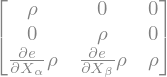

In [4]:
A

The inverse of $A$ is $\partial w/\partial \mathcal{U}$

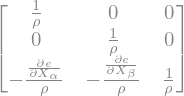

In [5]:
simplify(A.inv())

Now the reaction part

In [22]:
oma, domadXr, domadXa, domadXb, domade = symbols(r"\omega_\alpha \frac{\partial\omega_\alpha}{\partial\rho} \frac{\partial{}\omega_\alpha}{\partial{}X_\alpha} \frac{\partial{}\omega_\alpha}{\partial{}X_\beta} \frac{\partial{}\omega_\alpha}{\partial{}e}")
omb, dombdXr, dombdXa, dombdXb, dombde = symbols(r"\omega_\beta \frac{\partial{}\omega_\beta}{\partial\rho} \frac{\partial{}\omega_\beta}{\partial{}X_\alpha} \frac{\partial{}\omega_\beta}{\partial{}X_\beta} \frac{\partial{}\omega_\beta}{\partial{}e}")
domadT = symbols(r"\frac{\partial{}\omega_\alpha}{\partial{}T}")
dombdT = symbols(r"\frac{\partial{}\omega_\beta}{\partial{}T}")
S, dSdr, dSdXa, dSdXb, dSde = symbols(r"S \frac{\partial{}S}{\partial\rho} \frac{\partial{}S}{\partial{}X_\alpha} \frac{\partial{}S}{\partial{}X_\beta} \frac{\partial{}S}{\partial{}e}")
dSdT = symbols(r"\frac{\partial{}S}{\partial{}T}")


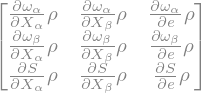

In [7]:
dRdw = Matrix(
     [[r*domadXa, r*domadXb, r*domade],
      [r*dombdXa, r*dombdXb, r*dombde],
      [r*dSdXa, r*dSdXb, r*dSde]])
dRdw

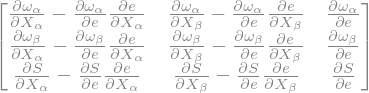

In [8]:
dwdU = simplify(A.inv())
dRdU = simplify(dRdw * dwdU)
dRdU

## Second Attempt

This adds $\rho$

$\mathcal{U} = (\rho, \rho_\alpha, \rho X_\beta, \rho e)^\intercal$

$w = (\rho, X_\alpha, X_\beta, e)^\intercal$


In [9]:
A = Matrix(
    [[1, 0, 0, 0],
     [Xa, r, 0, 0],
     [Xb, 0, r, 0],
     [e, r*dedXa, r*dedXb, r]])

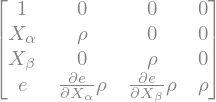

In [10]:
A

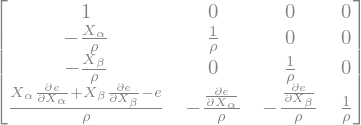

In [11]:
dwdU = simplify(A.inv())
dwdU

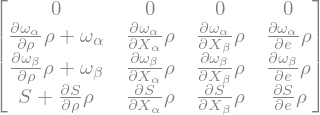

In [12]:
dRdw = Matrix(
    [[0, 0, 0, 0],
     [oma + r*domadXr, r*domadXa, r*domadXb, r*domade],
     [omb + r*dombdXr, r*dombdXa, r*dombdXb, r*dombde],
     [S + r*dSdr, r*dSdXa, r*dSdXb, r*dSde]])

dRdw

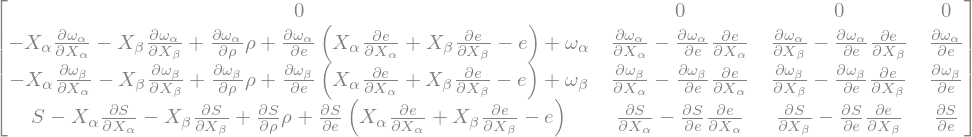

In [13]:
dRdU = simplify(dRdw * dwdU)
dRdU

## Third attempt -- back to T

We want to compute the Jacobian $\partial w/\partial \mathcal{U}$ with

$\mathcal{U} = (\rho X_\alpha, \rho X_\beta, \rho e)^\intercal$

$w = (X_\alpha, X_\beta, T)^\intercal$

We'll start by writing down

$A = \partial \mathcal{U}/\partial w$

and then find its inverse

In [14]:
A = Matrix(
    [[r, 0, 0],
     [0, r, 0],
     [r*dedXa, r*dedXb, r*dedT]])

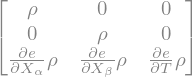

In [15]:
A

The inverse of $A$ is $\partial w/\partial \mathcal{U}$

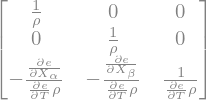

In [16]:
simplify(A.inv())

Now the reaction part

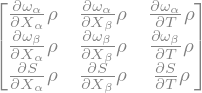

In [23]:
dRdw = Matrix(
     [[r*domadXa, r*domadXb, r*domadT],
      [r*dombdXa, r*dombdXb, r*dombdT],
      [r*dSdXa, r*dSdXb, r*dSdT]])
dRdw

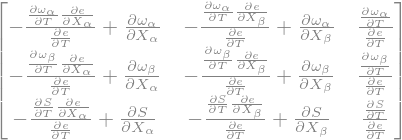

In [24]:
dwdU = simplify(A.inv())
dRdU = simplify(dRdw * dwdU)
dRdU